## Distances and Angles between Images

We are going to compute distances and angles between images.

## Learning objectives
By the end of this notebook, you will learn to 

1. Write programs to compute distance.
2. Write programs to compute angle.

"distance" and "angle" are useful beyond their usual interpretation. They are useful for describing __similarity__ between objects. You will
first use the functions you wrote to compare MNIST digits. Furthermore, we will use these concepts for implementing the K Nearest Neighbors algorithm, which is a useful algorithm for classifying object according to distance.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
from sklearn.datasets import fetch_openml

from ipywidgets import interact, interactive

The next cell loads the MNIST digits dataset.

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [5]:
mnist['data'].dtype, mnist['target'].dtype

(dtype('float64'), dtype('O'))

In [6]:
images = mnist['data']
labels = mnist['target'].astype(np.int)

images.shape, labels.shape

((70000, 784), (70000,))

For this assignment, you need to implement the two functions (`distance` and `angle`) in the cell below which compute the distance and angle between two vectors.

In [8]:
def distance(x0, x1):
    """Compute distance between two vectors x0, x1 using the dot product"""
    distance = np.linalg.norm(x0 - x1)
    return distance


def angle(x0, x1):
    """Compute the angle between two vectors x0, x1 using the dot product"""
    angle = np.arccos(np.dot(x0, x1) / (np.linalg.norm(x0) * np.linalg.norm(x1)))
    return angle


We have created some helper functions for you to visualize vectors in the cells below. You do not need to modify them.

In [9]:
def plot_vector(v, w):
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

In [10]:
# Some sanity checks, you may want to have more interesting test cases to test your implementation
a = np.array([1,0])
b = np.array([0,1])

np.testing.assert_almost_equal(distance(a, b), np.sqrt(2))
assert((angle(a,b) / (np.pi * 2) * 360.) == 90)

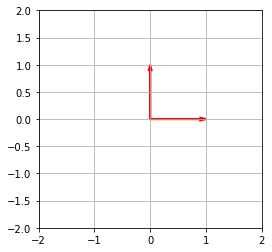

In [11]:
plot_vector(b, a)

The next cell shows some digits from the dataset.

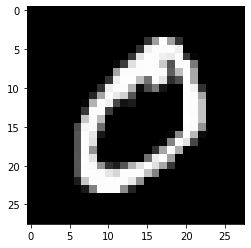

In [12]:
plt.imshow(images[labels==0].reshape(-1, 28, 28)[0], cmap='gray');

But we have the following questions:

1. What does it mean for two digits in the mnist dataset to be _different_ by our distance function? 
2. Furthermore, how are different classes of digits different for mnist digits? Let's find out!

For the first question, we can see just how the distance between digits compare among all distances for 
the first 500 digits. The next cell computes pairwise distances between images.

In [13]:
distances = []

for i in range(len(images[:500])):
    for j in range(len(images[:500])):
        distances.append(distance(images[i], images[j]))

In [14]:
distances[1]

2387.111643807218

In [15]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(18, 6))
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    ax2.set(xlabel='distance', ylabel='number of images')

    d = distance(images[first], images[second])
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 25000, "Distance is {:.2f}".format(d), size=12)
  

interactive(children=(IntSlider(value=249, description='first', max=499), IntSlider(value=249, description='se…

In [47]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def most_similar_image():
    """Find the index of the digit, among all mnist digits
       that is the second-closest to the first image in the dataset (the first image is closest to itself trivially). 
       Your answer should be a single integer.
    """
    res = [1, distance(images[1], images[0])]

    for i in range(2, len(images)):
        if distance(images[i], images[0]) < res[1]:
            res = [i, distance(images[i], images[0])]

    return res[0]


FIRST IMAGE:


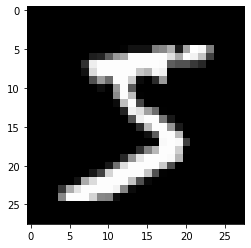

MOST SIMILAR IMAGE:


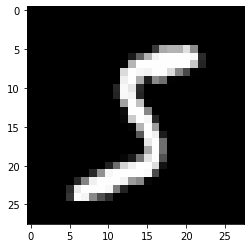

In [51]:
print("FIRST IMAGE:")
plt.imshow(images[0].reshape(28, 28), cmap='gray', interpolation='none');
plt.show()

print("MOST SIMILAR IMAGE:")
index = most_similar_image()
plt.imshow(images[index].reshape(28, 28), cmap='gray');


For the second question, we can compute a `mean` image for each class of image, i.e. we compute mean image for digits of `1`, `2`, `3`,..., `9`, then we compute pairwise distance between them. We can organize the pairwise distances in a 2D plot, which would allow us to visualize the dissimilarity between images of different classes.

First we compute the mean for digits of each class.

In [98]:
means = {}

for n in np.unique(labels):
    means[n] = np.mean(images[labels==n], axis=0)

np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

For each pair of classes, we compute the pairwise distance and 
store them into MD (mean distances). We store the angles between the mean digits in AG

In [99]:
a = np.array([1, 2.2])
b = np.array([4, 2.2])

a.shape, a@ b

angle(means[9], means[9])

0.0

In [100]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))

for i in means.keys():
    for j in means.keys():
        MD[i, j] = distance(means[i], means[j])
        if i != j:
            AG[i, j] = angle(means[i], means[j])


Now we can visualize the distances! Here we put the pairwise distances. The colorbar
shows how the distances map to color intensity.

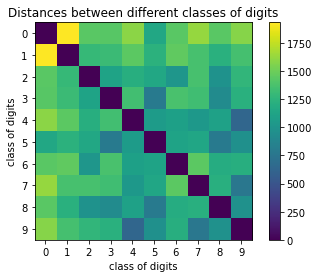

In [101]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')

ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))

fig.colorbar(grid)
plt.show()

Similarly for the angles.

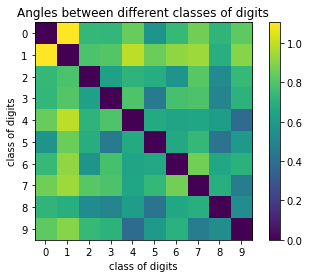

In [103]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')

ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))

fig.colorbar(grid)
plt.show();